## Wine Quality Prediction


<b>
<u> Submitted by: </u> <br>
Sushma Shrestha<br>
KCE080BCT043


### Documentation

__Objective:__  
Predict the quality of wine on a scale (e.g., 0 to 10) based on physicochemical properties such as acidity, pH, alcohol content, and sugar levels.  


__Dataset__  
This dataset is publicly available at the UCI Machine Learning Repository and should be cited appropriately when used.

https://archive.ics.uci.edu/dataset/186/wine+quality

The dataset includes data for Portuguese red and white "Vinho Verde" wines, with variables based on physicochemical properties and sensory quality scores. This dataset can be used for classification or regression tasks, though the classes are imbalanced. 

<u>Both the datasets are considered</u>.

The dataset contains 12 feature  that includes:  
- Input variables (based on physicochemical tests): 
   1. Fixed acidity: Acidity level that remains after fermentation
   2. Volatile acidity: Acetic acid amount affecting taste
   3. Citric acid: Enhances flavor, adds freshness
   4. Residual sugar: Sugar left after fermentation 
   5. Chlorides: Salt content
   6. Free sulfur dioxide: SO₂ not bound and acts as an antimicrobial
   7. Total sulfur dioxide: Total amount of SO₂ (bound + free)
   8. Density: Wine density, related to alcohol and sugar content
   9. pH: Acidity level
   10. Sulphates: Contributes to microbial stability
   11. Alcohol: Alcohol percentage   

- Output variable (based on sensory clean wine dataset):  
   12. Quality (score between 0 and 10): Sensory quality score (0 to 10)

### Importing Dependencies

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import zscore
from scipy.stats import boxcox, skew, yeojohnson

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Data Collection

In [89]:
df2=pd.read_csv("winequality-red.csv")
df1=pd.read_csv("winequality-white.csv")

In [90]:
df = pd.concat([df2, df1], ignore_index=True)

### Initial Data Exploration

In [91]:
print(df1.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [92]:
print(df2.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [93]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [94]:
df.shape

(6497, 12)

In [95]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [96]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


### Data Cleaning

For this dataset, there are no missing values as per the initial exploration and all data types for this dataset are appropriate.

In [98]:
# Remove duplicate rows, ignoring the 'Id' column
df = df.drop_duplicates(subset=df.columns.difference(['Id']), keep='first')

print(f"Dataset after removing duplicates: {df.shape[0]} rows")


Dataset after removing duplicates: 5318 rows


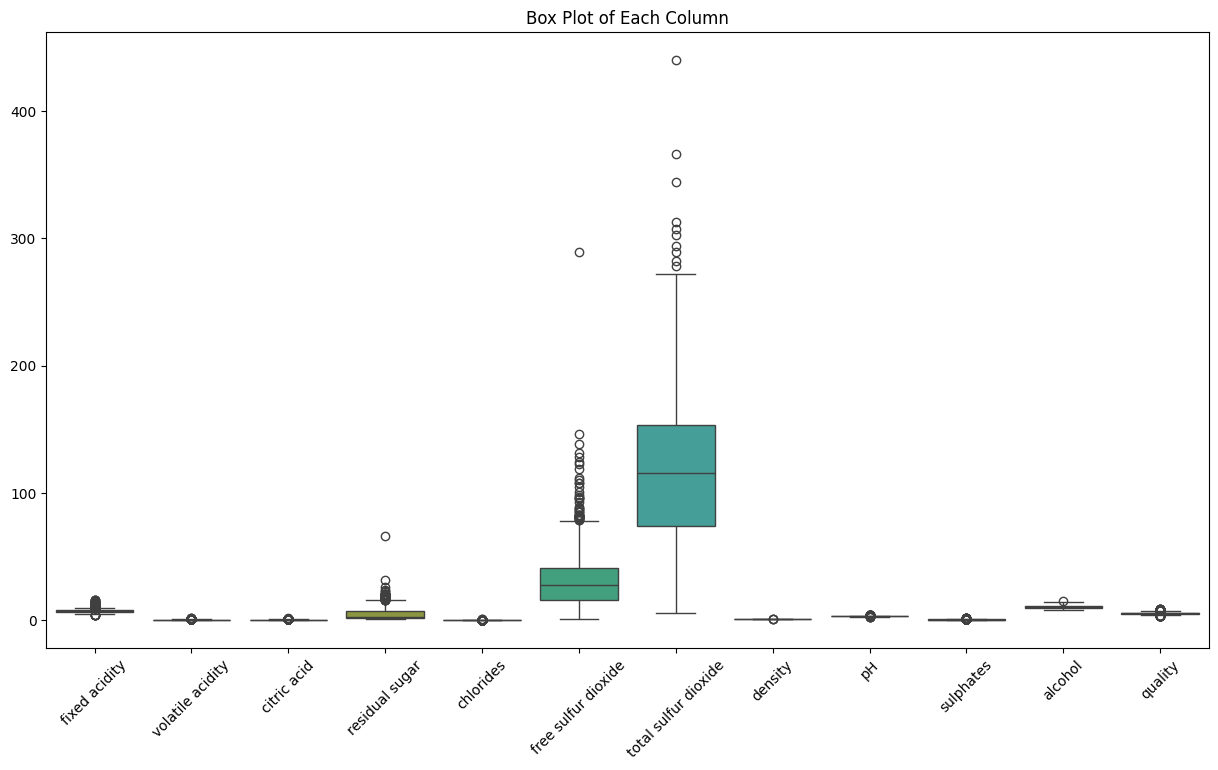

In [99]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of Each Column')
plt.show()

#### Skewness and Outliers

In [100]:
df.skew()

fixed acidity           1.650055
volatile acidity        1.504115
citric acid             0.483817
residual sugar          1.706027
chlorides               5.339077
free sulfur dioxide     1.363772
total sulfur dioxide    0.063667
density                 0.666033
pH                      0.390358
sulphates               1.809099
alcohol                 0.545866
quality                 0.147470
dtype: float64

In [101]:
z_scores = df.apply(zscore)
outliers = (abs(z_scores) > 3).sum()

print("Number of outliers in each column:\n", outliers)

Number of outliers in each column:
 fixed acidity           108
volatile acidity         77
citric acid              23
residual sugar           42
chlorides                94
free sulfur dioxide      27
total sulfur dioxide      8
density                   3
pH                       32
sulphates                63
alcohol                   2
quality                  35
dtype: int64


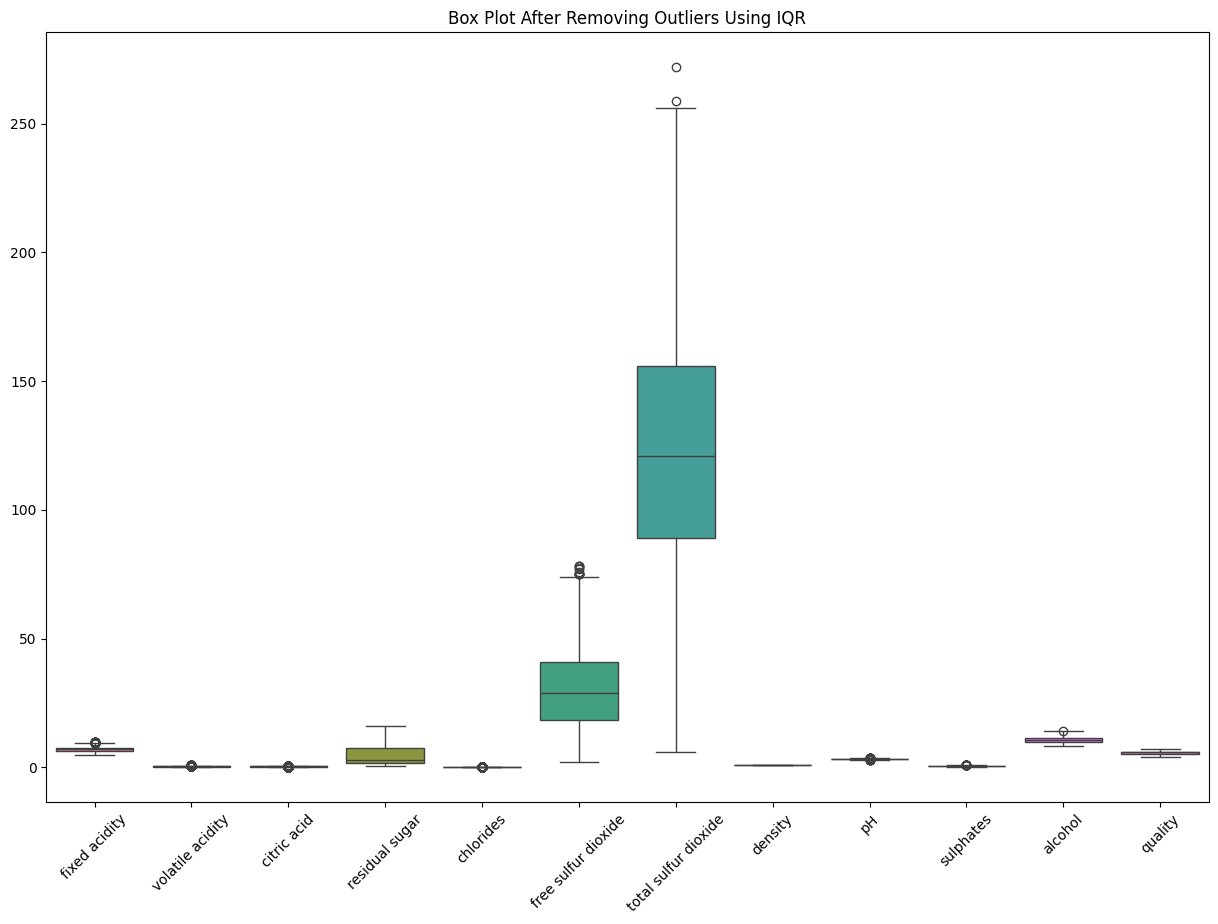

Outliers removed per column using IQR:
{'fixed acidity': 1239, 'volatile acidity': 1239, 'citric acid': 1239, 'residual sugar': 1239, 'chlorides': 1239, 'free sulfur dioxide': 1239, 'total sulfur dioxide': 1239, 'density': 1239, 'pH': 1239, 'sulphates': 1239, 'alcohol': 1239, 'quality': 1239}


In [102]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_no_outliers

# Remove outliers using IQR method
df_cleaned_iqr = remove_outliers_iqr(df)

# Box plot after removing outliers using IQR
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_cleaned_iqr)
plt.xticks(rotation=45)
plt.title('Box Plot After Removing Outliers Using IQR')
plt.show()

# Display the number of outliers removed
outliers_removed_iqr = {column: len(df) - len(df_cleaned_iqr) for column in df.columns}
print("Outliers removed per column using IQR:",)
print(outliers_removed_iqr)

In [103]:
df = df_cleaned_iqr

Skewness after transformation:
 fixed acidity           0.000740
volatile acidity        0.004386
citric acid            -0.452649
residual sugar          0.058139
chlorides               0.056886
free sulfur dioxide    -0.076388
total sulfur dioxide   -0.131492
density                -0.003520
pH                      0.000561
sulphates              -0.001470
alcohol                 0.051896
quality                -0.093618
dtype: float64


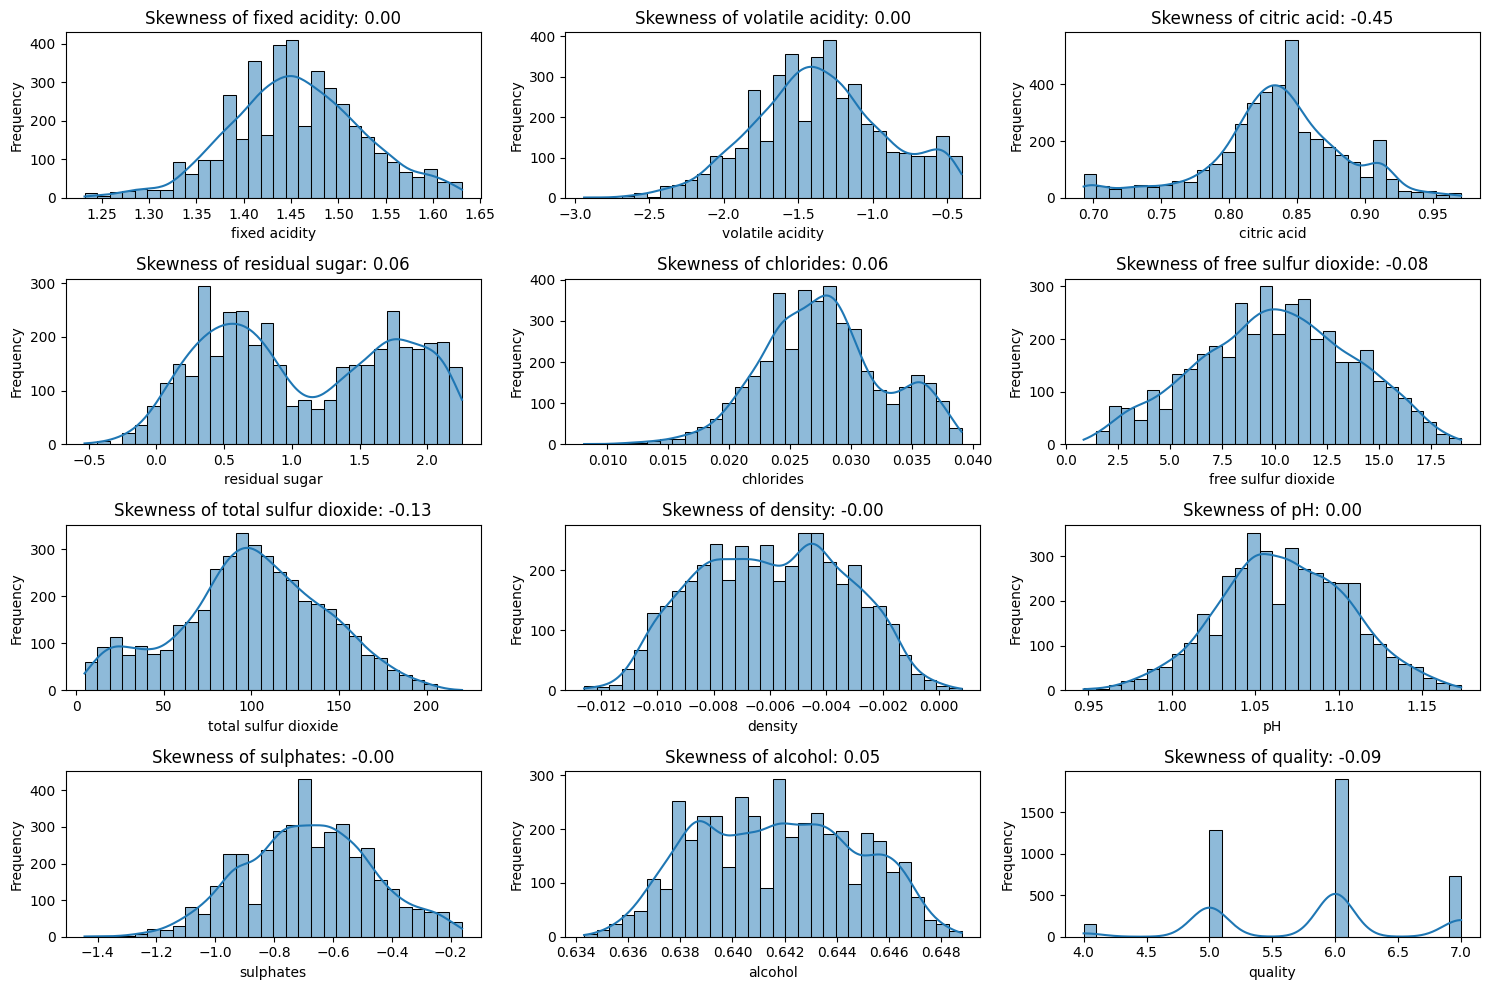

In [104]:
# Function to apply transformations
def reduce_skewness(df):
    transformed_df = df.copy()
    for column in df.columns:
        if column == 'quality':
            continue  # Skip the 'quality' column
        elif column == 'chlorides':
            # Apply Yeo-Johnson transformation to 'chlorides'
            transformed_df[column], _ = yeojohnson(df[column])
        elif df[column].min() > 0:  # Box-Cox requires positive values
            transformed_df[column], _ = boxcox(df[column])
        else:
            # For columns with zero or negative values, use log1p or other transformations
            transformed_df[column] = np.log1p(df[column] - df[column].min() + 1)
    return transformed_df

# Apply the transformation
df_transformed = reduce_skewness(df)

# Calculate skewness after transformation
skewness_after = df_transformed.apply(skew)
print("Skewness after transformation:\n", skewness_after)

# Plot histograms to show reduced skewness
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_transformed.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_transformed[column], kde=True, bins=30)
    plt.title(f'Skewness of {column}: {skewness_after[column]:.2f}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [105]:
df_transformed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5,1.495352,-0.425772,0.693147,0.561889,0.035009,5.764334,34.430566,-0.002191,1.139133,-0.569385,0.638448,5
6,1.530369,-0.526386,0.722706,0.453345,0.033897,6.398297,50.375056,-0.003577,1.088274,-0.757892,0.638448,5
7,1.487977,-0.441814,0.693147,0.179778,0.033066,6.398297,18.126734,-0.005348,1.110517,-0.737396,0.640436,7
8,1.523601,-0.562445,0.703098,0.657324,0.034655,4.351814,15.502030,-0.003182,1.103179,-0.552309,0.638801,7
9,1.502599,-0.722003,0.858662,1.577669,0.034284,6.996365,85.688643,-0.002191,1.100716,-0.221587,0.641877,5


In [106]:
df=df_transformed

### EDA and Visualization

#### 1. Target Variable Analysis

C:\Users\shres\AppData\Local\Temp\ipykernel_30932\3086844252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


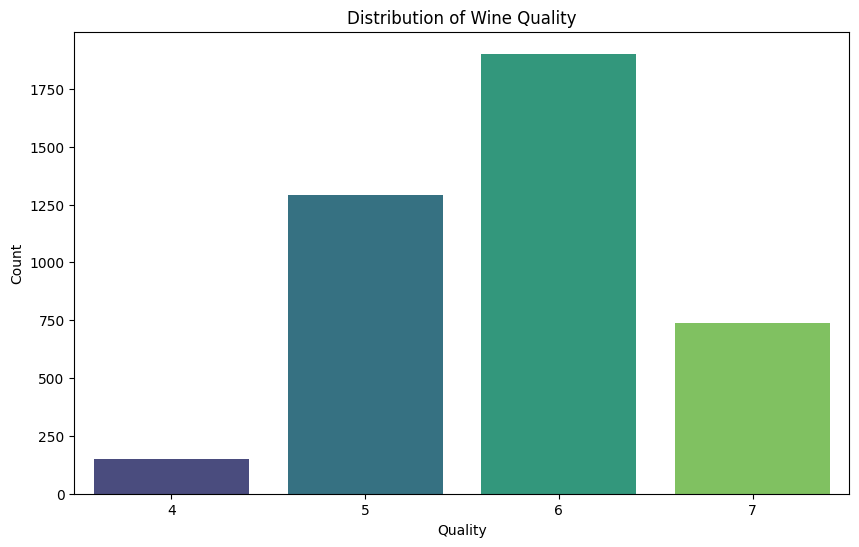

C:\Users\shres\AppData\Local\Temp\ipykernel_30932\3086844252.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality_binned', data=df, palette='viridis')


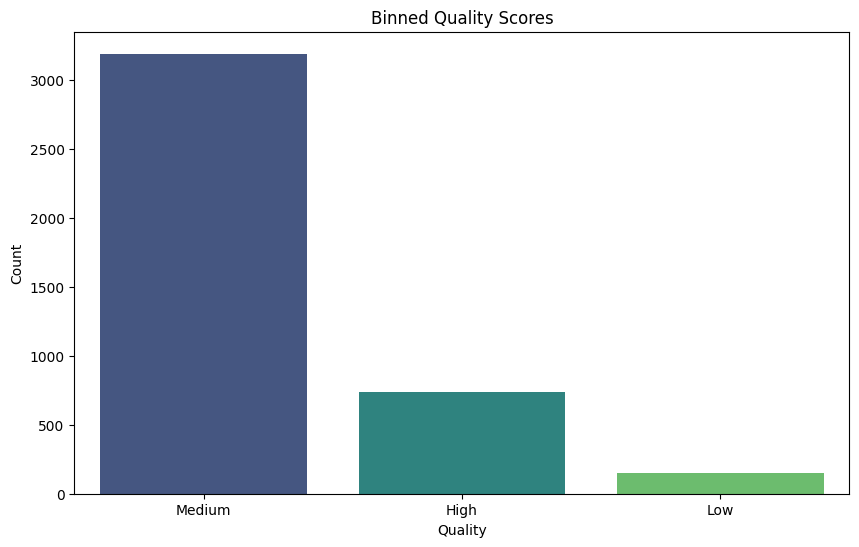

In [107]:
# Distribution of wine quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

def categorize_quality(q):
    if q <= 4:
        return "Low"
    elif 5 <= q <= 6:
        return "Medium"
    else:
        return "High"
df['quality_binned'] = df['quality'].apply(categorize_quality)

 # Analyze binned quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality_binned', data=df, palette='viridis')
plt.title('Binned Quality Scores')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

As per the bar graphs, the quality of wine in the dataset ranges from the score 4 to 7 where most of the wines are of score 6 and then 5. 

This means most of them are of medium quality as shown in the second graph.

In [108]:
print(df['quality_binned'])

5       Medium
6       Medium
7         High
8         High
9       Medium
         ...  
6492    Medium
6493    Medium
6494    Medium
6495      High
6496    Medium
Name: quality_binned, Length: 4079, dtype: object


In [109]:
print(df.shape, "\n")
quality_count = df['quality_binned'].value_counts()
print(quality_count)


(4079, 13) 

quality_binned
Medium    3192
High       738
Low        149
Name: count, dtype: int64


#### 2. Feature-Target Relationship

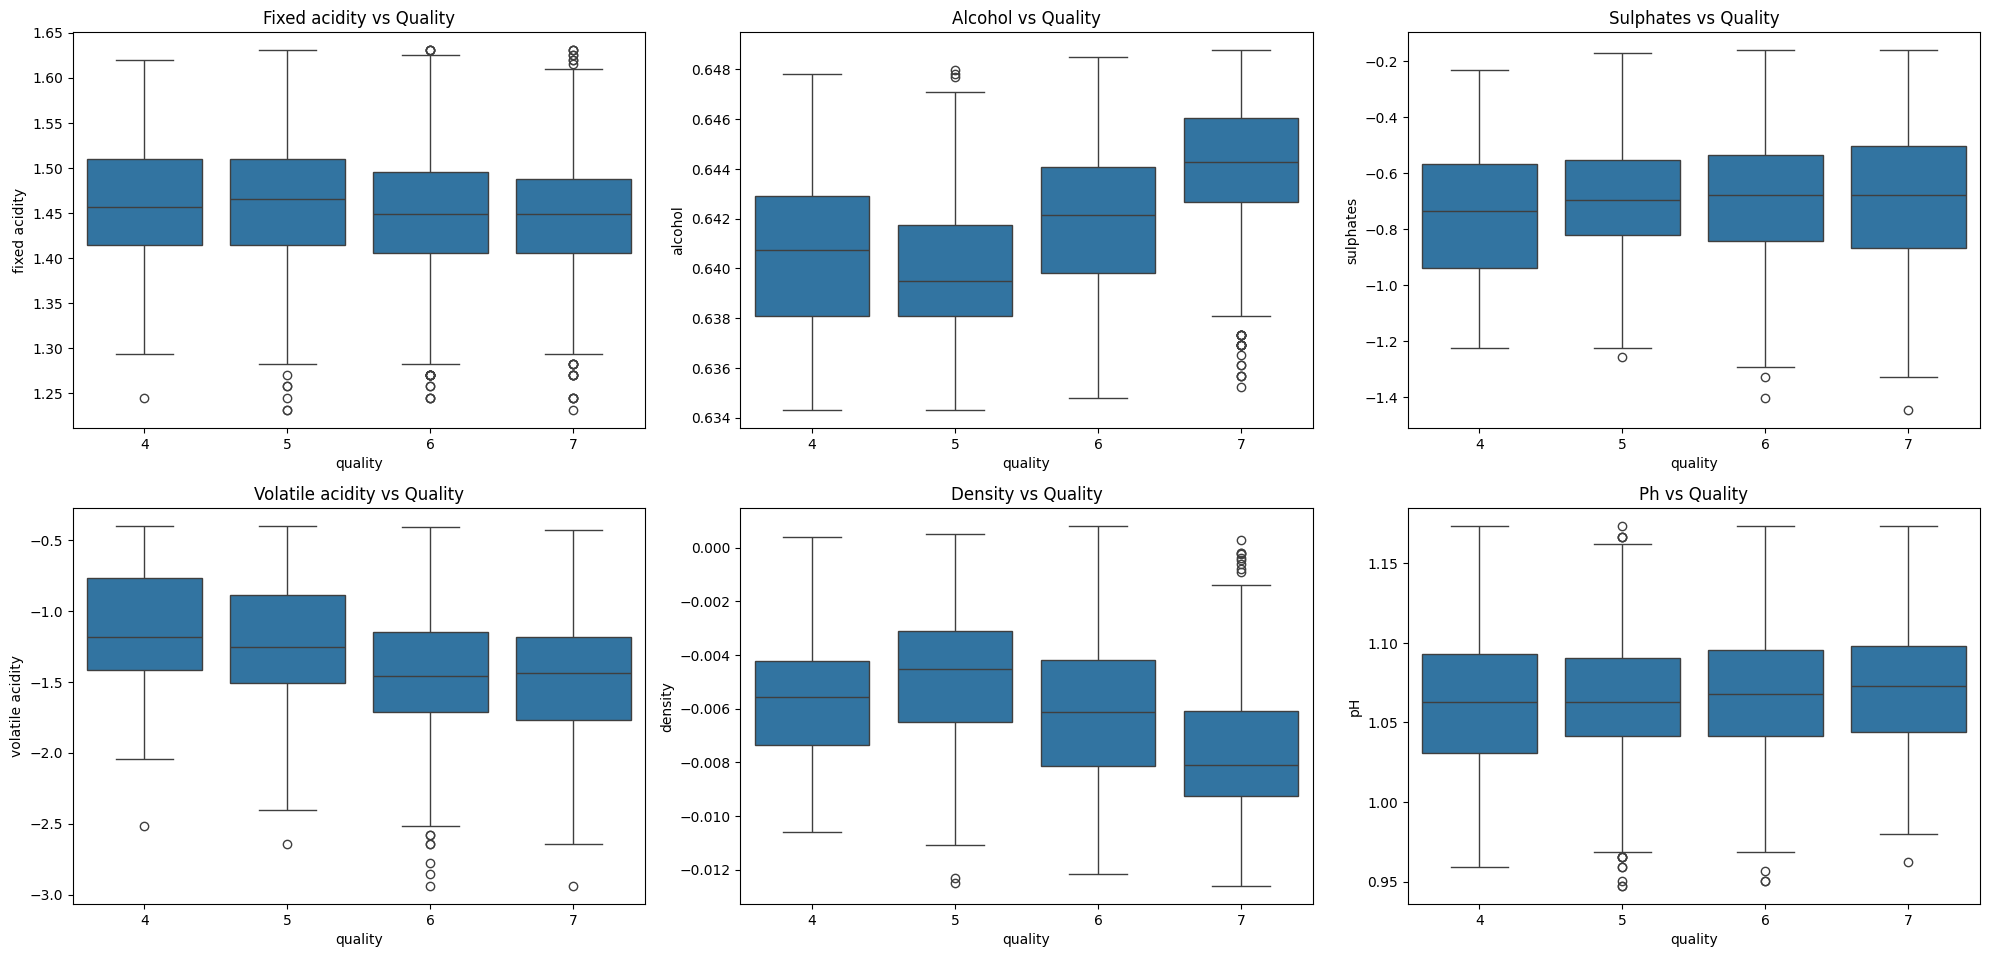

In [110]:
# Key Features vs. Quality
features = ['fixed acidity', 'alcohol', 'sulphates', 'volatile acidity', 'density', 'pH']
plt.figure(figsize=(20, 14))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Adjusted to 3 rows and 2 columns
    sns.boxplot(x='quality', y=feature, data=df)
    plt.title(f'{feature.capitalize()} vs Quality')

plt.tight_layout()
plt.show()

Observations from the box plots:
 * The median fixed acidity remains relatively consistene across different quality ratings which means fixed acidity alone may not be a significant differentiator of wine quality.
 * The median alcohol content increases with higher quality ratings i.e. higher alcohol content tend to increase the quality of wine.
 * The consistent median sulphates level across quality ratings indicatet that sulphates might not have a strong infulence on wine quality.
 * The decreasing mean volatile acidity with increasing quality ratings indicate that lower volatile acidity is assosciated with higher quality of wines.
 * The relatively stable median density across quality ratings refer that density alone may not significantly determine wine quality.
 * The consistent median pH level across different quality ratings show that pH is not a primary factor for wine quality determination.


#### 3. Feature Interactions

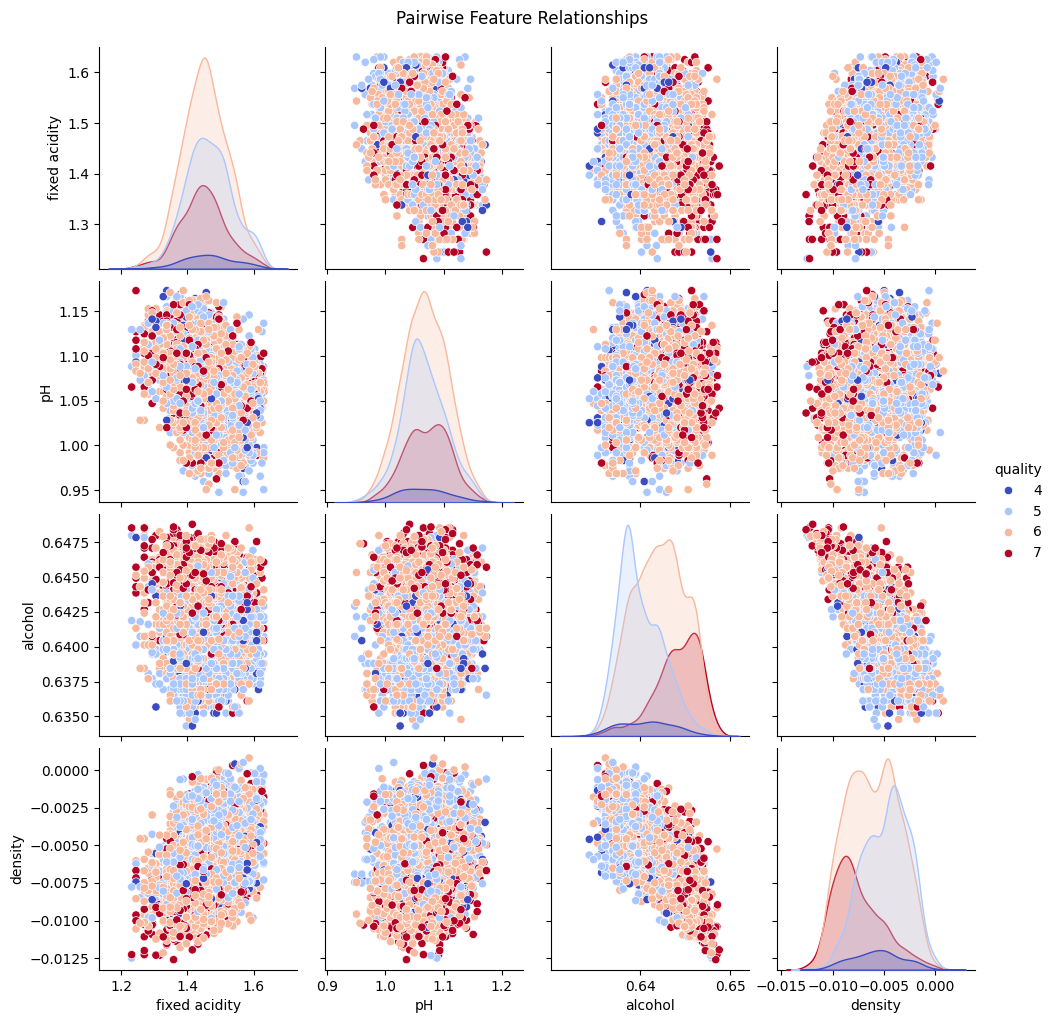

In [111]:
# Pairwise Feature Relationships
sns.pairplot(df[['fixed acidity', 'pH', 'alcohol', 'density', 'quality']], hue='quality', palette='coolwarm')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

Observations from this plot:
 * Quality 4 has it's peak aroun 1.0, 5 peaks around 1.0, 6 around 1.2 and quality 7 peaks around 1.3
 * Higher quality (7) have higher fixed acidity and lower pH.
 * Higher quality are assosciated with higher fixed acidity and higher alcohol content.
 * Higher quality tend to have higher fixed acidity and higher density.
 * Higher quality exhibit lower pH, higher density and higher alcohol content.
 * Higher quality samples have higher alcohol content and higher density.

#### 4. pH and Acidity Analysis

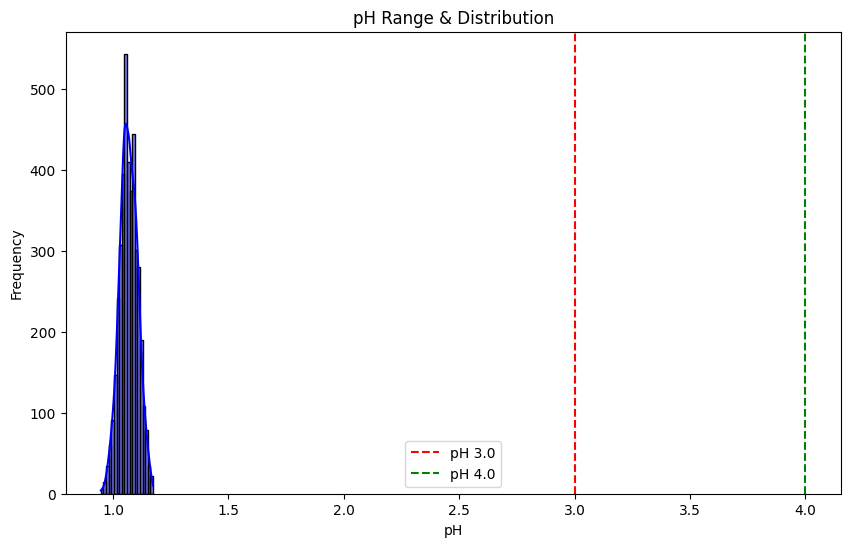

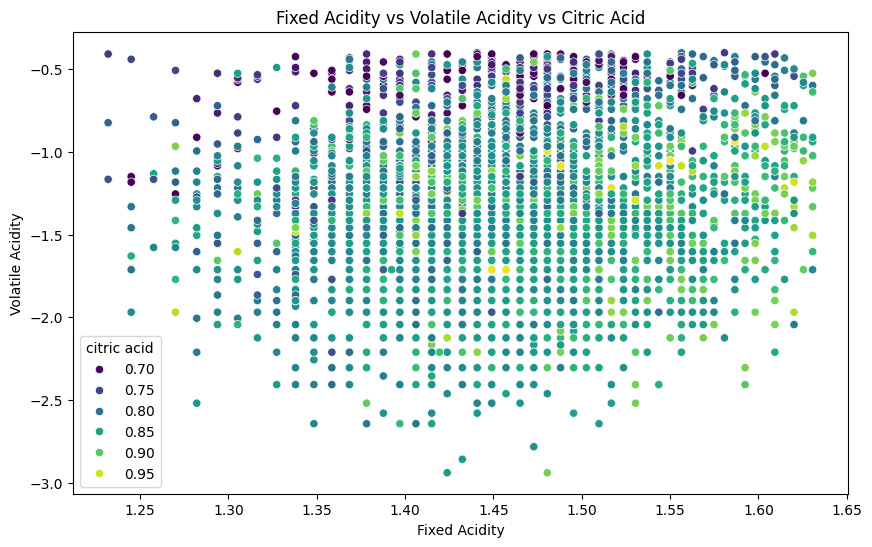

In [112]:
# pH Range & Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['pH'], bins=20, kde=True, color='blue')
plt.axvline(3.0, color='red', linestyle='--', label='pH 3.0')
plt.axvline(4.0, color='green', linestyle='--', label='pH 4.0')
plt.title('pH Range & Distribution')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Acidity Composition Breakdown
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fixed acidity', y='volatile acidity', hue='citric acid', data=df, palette='viridis')
plt.title('Fixed Acidity vs Volatile Acidity vs Citric Acid')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.show()

The pH range and distribution graph shows the distribution of pH values within an acidic range (0 to 4.0).

The second graph compares three types of acidity that helps to understand the relationships between fixed acidity, volatile acidity and citric acid.

#### 5. Sulfur Dioxide Effects

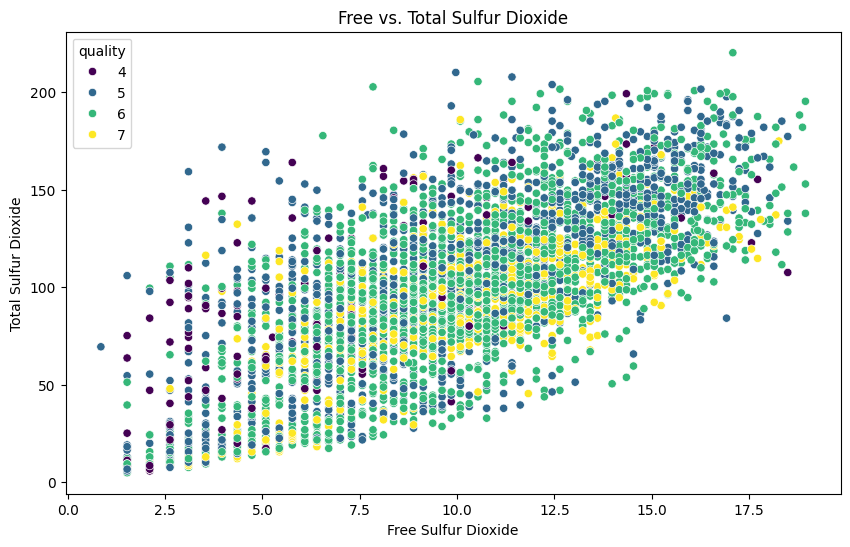

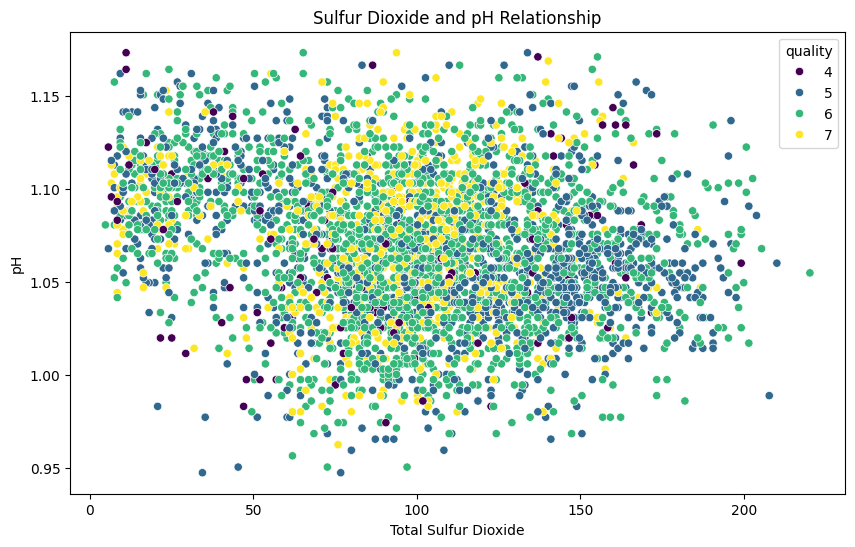

In [113]:
# Free vs. Total Sulfur Dioxide
plt.figure(figsize=(10, 6))
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', hue='quality', data=df, palette='viridis')
plt.title('Free vs. Total Sulfur Dioxide')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.show()

# Sulfur Dioxide and pH Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total sulfur dioxide', y='pH', hue='quality', data=df, palette='viridis')
plt.title('Sulfur Dioxide and pH Relationship')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('pH')
plt.show()

In the first plot, there is a positive correlation between free and total sulfur dioxide levels. Higher quality levels (yellow) are more densely clustered in certain regions, suggesting that both free and total sulfur dioxide levels may influence the quality metric.

The second plot shows that the data points are densely packed, indicating a wide range of sulfur dioxide and pH values. Most points are clustered between 0.8 and 1.8 for Total Sulfur Dioxide and between 1.2 and 1.8 for pH. This plot illustrates how the pH and sulfur dioxide levels correlate with the quality of the substance.

#### 6. Density Analysis

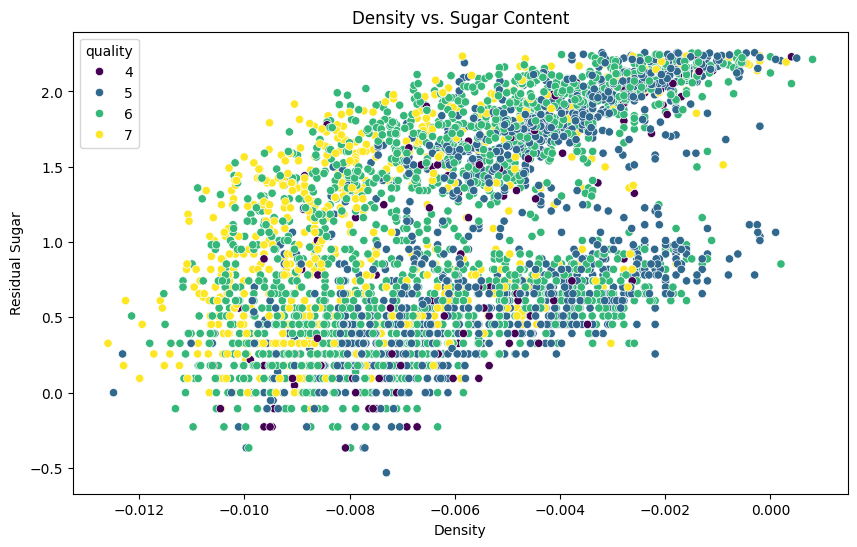

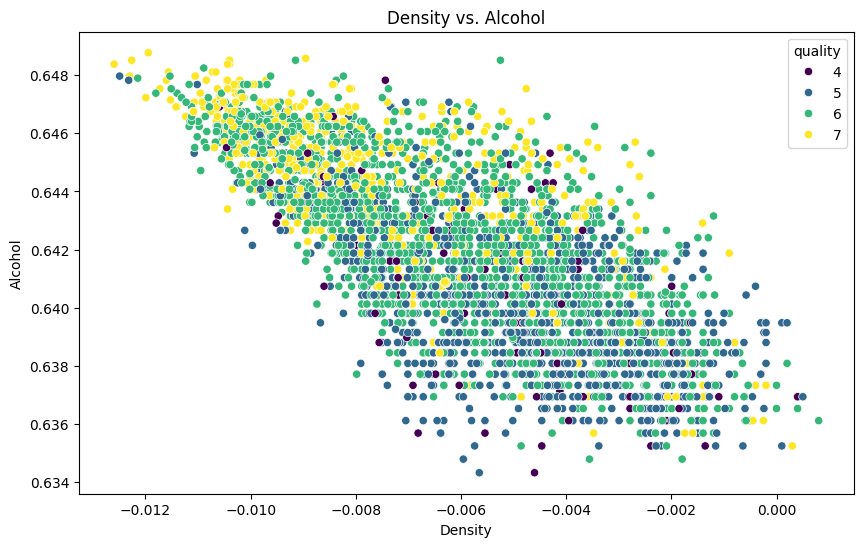

In [114]:
# Density vs. Sugar Content
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='residual sugar', hue='quality', data=df, palette='viridis')
plt.title('Density vs. Sugar Content')
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.show()

# Density vs. Alcohol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='alcohol', hue='quality', data=df, palette='viridis')
plt.title('Density vs. Alcohol')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.show()

The first scatter plot illustrates the correlation between Density and Residual Sugar content, color-coded by quality levels (4, 5, 6, and 7). As density increases, residual sugar content tends to rise. Higher quality samples (6 and 7) are more frequent at higher densities and residual sugar levels, whereas lower quality samples (4 and 5) are scattered throughout the plot. This indicates that density and residual sugar content influence the quality of the samples.

This second scatter plot illustrates the relationship between density and alcohol content, with each point color-coded by quality rating (4 to 7). There is a negative correlation: higher alcohol content is generally associated with lower density. Higher quality ratings (yellow for quality 7) tend to appear in regions with lower density and higher alcohol content. The densely packed points in the middle suggest many observations with moderate density and alcohol levels.


#### 7. Feature Engineering

   acidity_ratio  sulfur_balance  sugar_alcohol_ratio
5      -3.512094        0.167419             0.880086
6      -2.907315        0.127013             0.710075
7      -3.367881        0.352976             0.280712
8      -2.708891        0.280725             1.028997
9      -2.081152        0.081649             2.457899


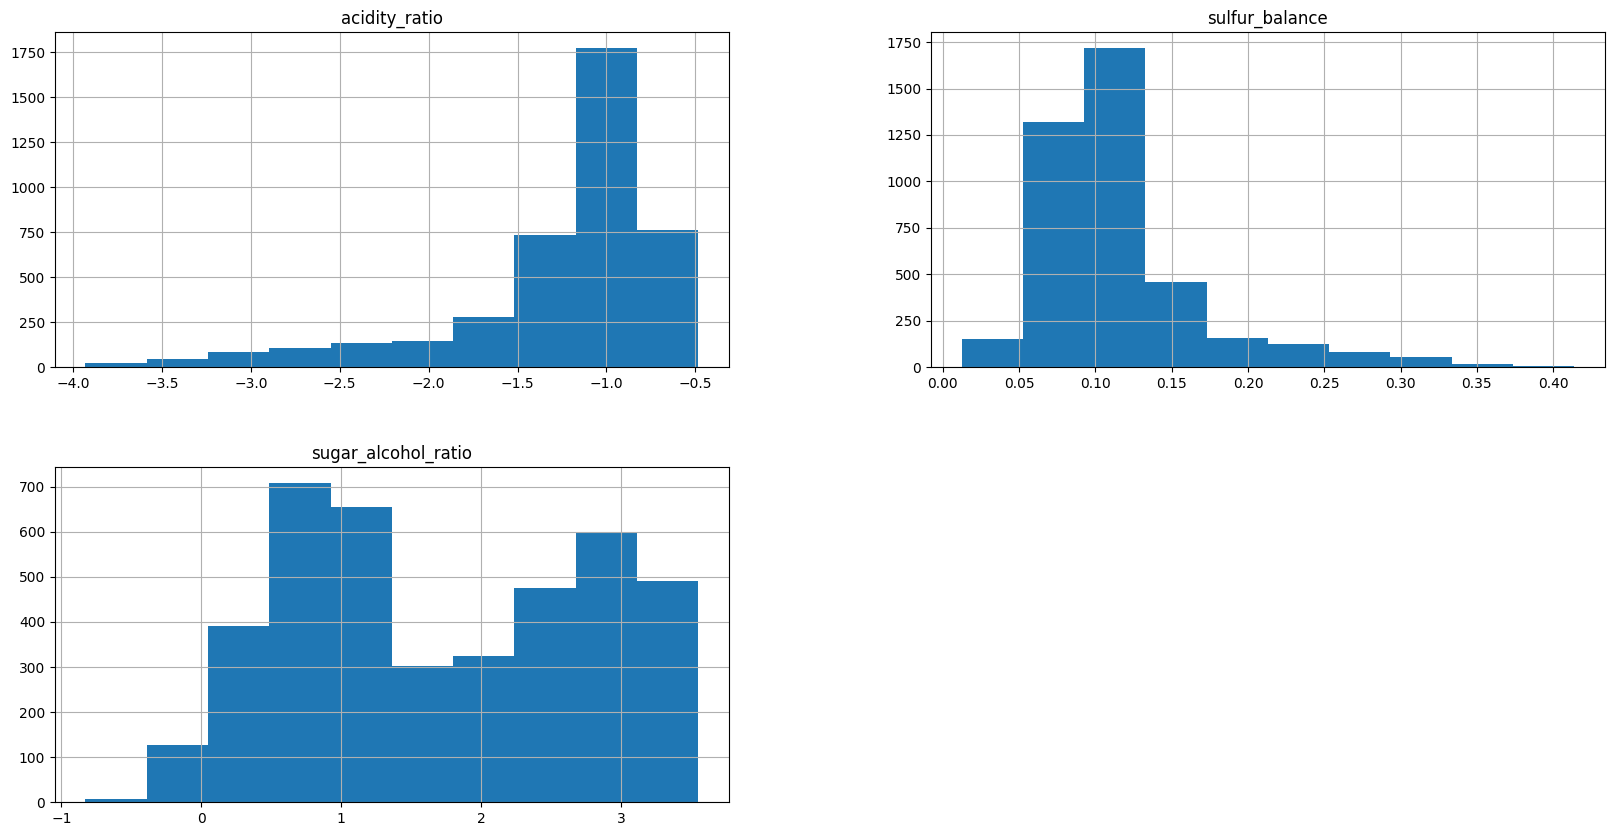

In [115]:
# New Features for Prediction
df['acidity_ratio'] = df['fixed acidity'] / df['volatile acidity']
df['sulfur_balance'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
df['sugar_alcohol_ratio'] = df['residual sugar'] / df['alcohol']

# Display new features
print(df[['acidity_ratio', 'sulfur_balance', 'sugar_alcohol_ratio']].head())

# Plot the new features
df[['acidity_ratio', 'sulfur_balance', 'sugar_alcohol_ratio']].hist(figsize=(20, 10), bins=10)
plt.show()


### Feature Selection Matrix

#### Correlation

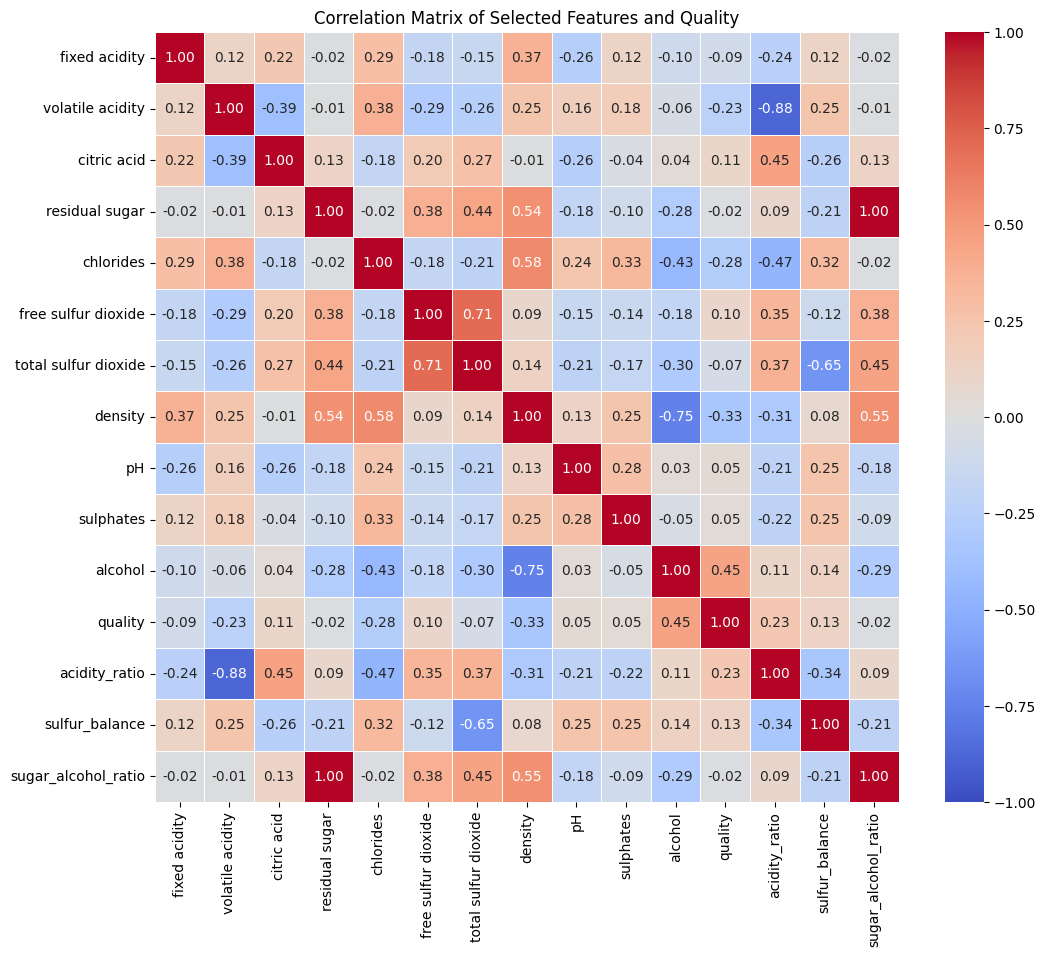

In [116]:
co_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'acidity_ratio', 'sulfur_balance', 'sugar_alcohol_ratio']

co_data = df[co_columns].copy()

corr_matrix = co_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features and Quality')
plt.show()


#### Chi-Square Test

In [117]:
X = df.drop(columns=['quality', 'quality_binned'])  # 'quality' is the target variable
y = df['quality_binned']

X = X.abs()  # Taking the absolute value to remove negative values

# Perform the Chi-Square Test
chi2_selector = SelectKBest(chi2, k=11)
X_new = chi2_selector.fit_transform(X, y)

# Get the Selected Feature Names
selected_feature_names = X.columns[chi2_selector.get_support()]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates',
       'acidity_ratio', 'sulfur_balance', 'sugar_alcohol_ratio'],
      dtype='object')


#### PCA

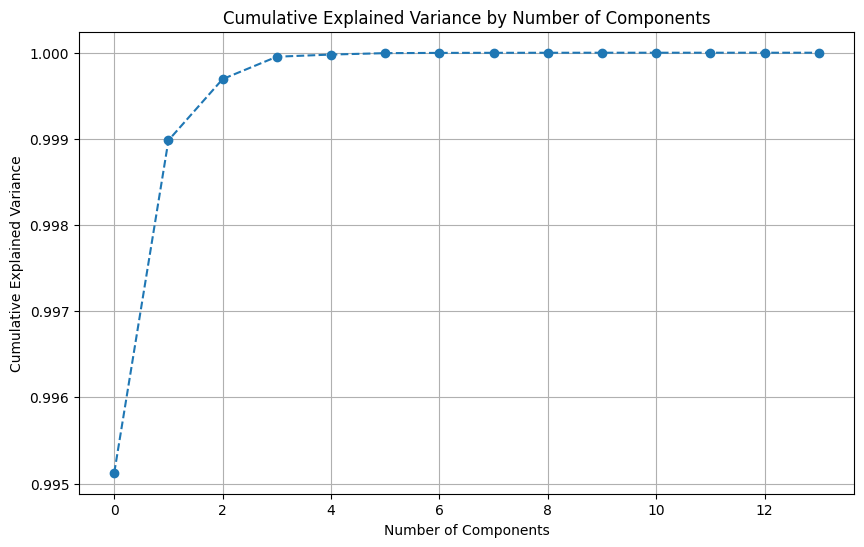

Optimal Number of Components: 0
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [118]:
# Apply PCA
pca = PCA()  # Initialize PCA without specifying the number of components
X_pca = pca.fit_transform(X)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.show()

# Determine the Optimal Number of Components
optimal_components = np.argmax(cumulative_explained_variance >= 0.95)
print(f"Optimal Number of Components: {optimal_components}")

# Step 9: Apply PCA with the Optimal Number of Components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X)

# Step 10: Create a DataFrame with the PCA Components
pca_wine_dataset = pd.DataFrame(X_pca_optimal, columns=[f'PC{i+1}' for i in range(optimal_components)])
print(pca_wine_dataset.head())

#### Scaling and Normalization

In [119]:
columns_to_normalize = [
    'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol','pH',
]
scaler = StandardScaler()

# Standardize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Check the standardized data
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count   4.079000e+03      4.079000e+03  4079.000000    4.079000e+03   
mean    1.644404e-15     -8.361376e-17     0.834501    1.254206e-16   
std     1.000123e+00      1.000123e+00     0.050817    1.000123e+00   
min    -3.180115e+00     -3.525791e+00     0.693147   -2.374492e+00   
25%    -7.093292e-01     -6.802944e-01     0.810930   -8.565761e-01   
50%     1.371774e-02     -5.018073e-02     0.837248   -1.678985e-01   
75%     6.589343e-01      6.562605e-01     0.862890    9.394163e-01   
max     2.475137e+00      2.103959e+00     0.970779    1.691966e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  4.079000e+03         4.079000e+03          4.079000e+03  4.079000e+03   
mean  -3.623263e-16        -2.369056e-16         -1.950988e-16 -1.672275e-16   
std    1.000123e+00         1.000123e+00          1.000123e+00  1.000123e+00   
min   -3.931940e+00        -2.501374e+00

### Model Training

On the basis of PCA and Chi-Square test, the following features are selected.

In [120]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = df['quality_binned'] 

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

Logistic Regression is the selected model.

In [122]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)

In [123]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [124]:
# Information of the split data

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


print("\n", np.unique(y_train))

print("\n", y_train.value_counts())
print("\n", y_test.value_counts())

(3263, 11)
(3263,)
(816, 11)
(816,)

 ['High' 'Low' 'Medium']

 quality_binned
Medium    2554
High       590
Low        119
Name: count, dtype: int64

 quality_binned
Medium    638
High      148
Low        30
Name: count, dtype: int64


To optimize the logistic regression model's hyperparameters to achieve the best performance on the dataset, particularly focusing on handling imbalanced classes using the f1_macro scoring metric, the following code is performed.

In [125]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.5, 13, 73],
    'solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='f1_macro')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000),
             param_grid={'C': [0.5, 13, 73], 'solver': ['liblinear', 'lbfgs']},
             scoring='f1_macro')

##### Model Evaluation

In [126]:
# Evaluate the model
y_pred = grid_search.best_estimator_.predict(X_test)
print(y_pred)

['Medium' 'Medium' 'Medium' 'High' 'Medium' 'Medium' 'Low' 'High' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'High' 'Medium' 'Medium' 'High'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'High' 'Medium'
 'Medium' 'High' 'Medium' 'High' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'High' 'High' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'High' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'High' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'High' 'Medium' 'High' 'Medium' 'Medium' 'Medium' 'High'
 'Medium' 'Medium' 'Medium' 'Medium' 'High' 'Medium' 'Medium' 'High'
 'Medium' 'High' 'Medium' 'High' 'High' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'High' 'Medium' 'Medium' 'Medium' 'Medium'
 'High' 'Medium' 'High' 'High' 'High' 'Medium' 'Medium' 'High' 'Medium'
 'Medium' 'Medium' 'Medium' 'High' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medi

In [127]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.92%


In [128]:
# Confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[ 94   0  54]
 [  1   4  25]
 [ 78  14 546]]


In [129]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        High       0.54      0.64      0.59       148
         Low       0.22      0.13      0.17        30
      Medium       0.87      0.86      0.86       638

    accuracy                           0.79       816
   macro avg       0.55      0.54      0.54       816
weighted avg       0.79      0.79      0.79       816



#### Demo

In [130]:
# Input data as strings
input_data = "7.9,0.35,0.46,3.6,0.078,15,37,0.9973,3.35,0.86,12.8"  # High
input_data2 = "8.3,0.625,0.2,1.5,0.08,27,119,0.9972,3.16,1.12,9.1"  # Low
input_data3 = "6.1,0.26,0.25,2.9,0.047,289,440,0.99314,3.44,0.64,10.5"   # Medium

# Convert strings to lists of floats
input_data_list = list(map(float, input_data.split(',')))
input_data_list2 = list(map(float, input_data2.split(',')))
input_data_list3 = list(map(float, input_data3.split(',')))

# Convert lists to NumPy arrays
input_data_as_numpy_array = np.array(input_data_list)
input_data_as_numpy_array2 = np.array(input_data_list2)
input_data_as_numpy_array3 = np.array(input_data_list3)

# Reshape arrays for model prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
input_data_reshaped2 = input_data_as_numpy_array2.reshape(1, -1)
input_data_reshaped3 = input_data_as_numpy_array3.reshape(1, -1)

prediction1 = model.predict(input_data_reshaped)
prediction2 = model.predict(input_data_reshaped2)
prediction3 = model.predict(input_data_reshaped3)

print(prediction1)
print(prediction2)
print(prediction3)


['High']
['Low']
['Medium']


d:\College\3rd Sem\data_science\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\College\3rd Sem\data_science\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\College\3rd Sem\data_science\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
